In [1]:
from espnet.espnet2.bin.spk_inference import Speech2Embedding
import numpy as np
import pandas as pd
import torch
import torchaudio as aud
import soundfile
from collections import defaultdict
import os


import torch.nn as nn
import torch.optim as optim

import torch.nn.functional as F

import copy

import matplotlib.pyplot as plt 
import tqdm 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,recall_score,f1_score,precision_recall_curve,precision_score


DIR_REAL = "data/real"
DIR_FAKE = "data/fake"

d:\MajorProject\.venv\lib\site-packages\tacotron_cleaner\__init__.py:78: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return s in _symbol_to_id and s is not '_' and s is not '~'
d:\MajorProject\.venv\lib\site-packages\tacotron_cleaner\__init__.py:78: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return s in _symbol_to_id and s is not '_' and s is not '~'


In [3]:
speech2spk_embed = Speech2Embedding.from_pretrained(
    model_tag="espnet/voxcelebs12_rawnet3"
)
waveform, samples = soundfile.read(
    "/home/arver/MajorProject/voxceleb_trainer/data/id10001/1zcIwhmdeo4/00001.wav"
)

# waveform=waveform.numpy()
embedding = speech2spk_embed(waveform)

label=[0]
data = pd.DataFrame((embedding.numpy()))
data['Label']=label
new_df = pd.DataFrame((embedding.numpy()))
new_df["Label"] = label
# data.loc[len(data)] = new_df
new_df = pd.concat([data, new_df], axis=0)
new_df
new_df=new_df.drop(index=0)


Fetching 24 files:   0%|          | 0/24 [00:00<?, ?it/s]

In [4]:
embedding

tensor([[ 1.5865, -1.0513,  0.1770, -0.3664, -1.6271, -0.2916,  0.1619,  0.2803,
         -0.8718,  0.9865, -0.3907,  0.3906, -0.6183,  1.8670, -0.1210,  0.0763,
         -0.2310,  0.4438, -0.9062, -0.5961,  0.7020, -1.2862, -0.0846,  1.4104,
         -0.4088, -0.1229,  0.4491, -0.8088, -0.0591,  0.1521, -0.7015,  0.7554,
          0.5151, -1.1902,  0.0190,  0.5636,  0.5181, -1.6099,  0.4023,  1.8012,
          1.7393, -0.2585,  1.1398, -0.2648, -0.5308,  1.4132,  1.2423,  0.6619,
          1.8324, -1.4277,  1.9367,  0.9986, -1.9118,  1.6553,  0.0293,  1.8297,
          1.1733, -0.4669,  0.8130,  0.1148,  0.4456, -0.8231,  0.6692,  1.1419,
          0.6736,  0.3556, -0.1194, -0.1668, -0.2273,  1.6860,  0.0551,  1.3743,
          1.6142,  1.5285, -0.9546,  0.3669,  1.7959, -0.4946, -1.2964, -0.4669,
          0.4337, -1.3660, -0.4580, -0.7590, -1.5727,  1.5465,  0.1561,  0.9038,
          1.0759,  0.0262, -0.4068,  0.4659, -0.7273,  0.2134, -0.2161, -1.6429,
          0.7624,  1.0100, -

In [5]:
def generate_spk_embed(filepath,label):
    speech2spk_embed = Speech2Embedding.from_pretrained(
        model_tag="espnet/voxcelebs12_rawnet3"
    )
    waveform, samples = soundfile.read(filepath)
    embedding = speech2spk_embed(waveform)
    _data = pd.DataFrame(embedding.numpy())
    _data["Label"] = label
    return _data

In [1]:
for filename in os.scandir(DIR_REAL):
    
    new_df=pd.concat([generate_spk_embed(filename.path, 0),new_df])
for filename in os.scandir(DIR_FAKE):
    new_df=pd.concat([generate_spk_embed(filename.path, 1),new_df])


NameError: name 'os' is not defined

In [546]:
# new_df=new_df.fillna(0)

In [1086]:
new_df=new_df.fillna(-1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,Label
0,0.266434,-0.207302,-0.102762,0.615494,0.062734,0.473537,0.667933,0.611245,0.277050,0.336296,...,-0.673731,-0.169248,-1.607772,-0.028492,1.165426,1.071803,-0.634584,-0.521676,1.796573,1
0,0.021625,-0.861577,-0.054217,0.551973,-0.395832,0.461792,1.071472,1.040119,-1.512797,0.305677,...,-0.050322,-0.350451,-1.910393,-0.235210,0.810860,-0.356453,-1.164396,-0.028261,0.336531,1
0,1.430655,0.210354,0.149655,1.266017,-0.209762,0.210922,0.079287,0.262863,-0.145274,0.587592,...,0.269231,-0.801288,-1.535257,-0.156761,0.914574,0.475922,-1.501757,0.107641,0.804791,1
0,0.311296,-0.228981,-0.439442,1.053226,0.302236,0.653754,0.657931,0.859791,0.163311,0.146419,...,0.031659,-0.212596,-1.402371,0.132119,1.019408,1.227912,-1.574905,0.023605,0.928621,1
0,1.661150,-0.170779,-0.261788,0.406275,-0.083256,0.690675,0.117171,0.046806,0.348536,0.484744,...,-0.217517,-0.044417,-1.080690,-0.913901,0.615673,0.839684,-0.911803,-0.042916,0.722198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.308060,2.244378,-1.232828,-1.238095,0.940236,0.721144,1.015002,-1.840672,-0.969170,-0.066821,...,-0.712801,-1.252089,0.606143,-0.581337,-1.496310,-0.627161,0.229815,-0.957532,-1.019000,0
0,-0.477407,2.020177,-0.369176,-0.983152,-0.188623,1.128044,-0.301371,-1.854112,0.266156,-0.346004,...,-0.438952,0.179166,1.040560,-1.098132,-1.972345,-1.402885,1.127077,-0.451067,0.106210,0
0,1.782478,-0.718692,0.272889,-0.029963,-1.831220,0.215785,0.264597,-0.663466,0.534976,-0.052698,...,0.251827,0.288940,-0.009113,-0.032745,-1.208307,-1.338087,0.099541,1.276004,1.800472,0
0,0.481712,-0.546993,0.570728,-1.862694,0.390016,0.002887,0.424809,0.990159,-0.121054,0.050268,...,0.639324,-0.010296,-1.095211,0.176200,-1.172210,0.882225,-0.248681,0.671098,1.023686,0


In [1317]:
X = new_df.drop("Label", axis=1).values
y = new_df["Label"].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=71
)
# Random state ensures that the splits that you generate are reproducible.
# Scikit-learn uses random permutations to generate the splits.
# The random state that you provide is used as a seed to the random number generator.
# This ensures that the random numbers are generated in the same order.
X_train_t = torch.FloatTensor(X_train)
X_test_t = torch.FloatTensor(X_test)
y_train_t = torch.LongTensor(y_train)
y_test_t = torch.LongTensor(y_test)

In [1318]:
y_train.shape

(108,)

In [1319]:
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=192, out_features=5)
        self.output = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.output(x)
        return x

In [1320]:
model=DNN()
model

DNN(
  (fc1): Linear(in_features=192, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=1, bias=True)
)

In [1321]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [1322]:
model = MLPClassifier(
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=40
                 )
model.fit(X_train, y_train)

/home/arver/MajorProject/.venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=40)

Text(0, 0.5, 'Loss')

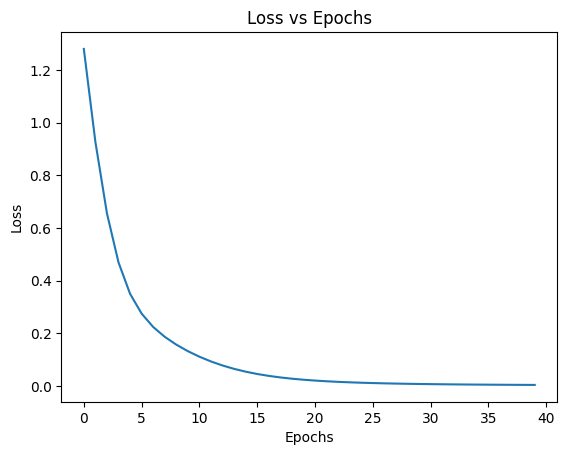

In [1323]:
plt.title('Loss vs Epochs')
plt.plot(model.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [1324]:
y_pred=model.predict(X_test)
y_pred,y_test

(array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 1]))

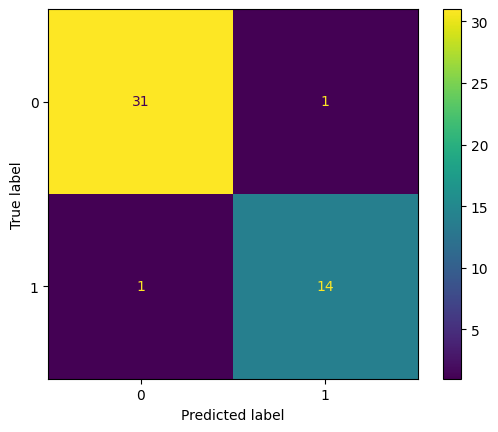

In [1328]:
ConfusionMatrixDisplay(confusion_matrix(y_pred=y_pred,y_true=y_test)).plot()


In [1327]:
print(f"Accuracy: {round(accuracy_score(y_pred,y_test)*100,2)}%")
print(f"Recall: {round(recall_score(y_pred,y_test)*100,2)}%")
print(f"F1 Score: {round(f1_score(y_pred,y_test)*100,2)}%")
print(f"Precision: {round(precision_score(y_pred,y_test)*100,2)}%")

Accuracy: 95.74%
Recall: 93.33%
F1 Score: 93.33%
Precision: 93.33%


In [1238]:
y_pred,y_train

(array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]),
 array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1]))

In [ ]:
epochs = 100
loss_arr = []

for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    loss_arr.append(loss)

    if i % 10 == 0:
        print(f"Epoch: {i} Loss: {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()